In [ ]:
# Plot the time series, along with any logical or necessary differences to get a stationary dataset.
# Generate and interpret a PACF for the time series and discuss any differences in correlations.
# Generate five ARIMA specifications and evaluate their efficacy at modeling your data.
# Finally, choose one specification and make a case for it as a logical model for your dataset.

# https://fred.stlouisfed.org/graph/?m=1wm8j#
# https://docs.google.com/spreadsheets/d/1R87fJQvg30_bwCDcVmlYTvqKaRatOK2KGKqCCWx0KWo/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

**Abilene Unemployment Rate: January 2015 - January 2025**

Will be using a secondary table made from the unemplyment data provided from FRED.

In [45]:
df = pd.read_csv('2015-01-01 to 2025-05-01 Unemployment Rate by Metropolitan Statistical Area (Percent) - Abilene TX Unemployment.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         125 non-null    datetime64[ns]
 1   Abilene, TX  125 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.1 KB


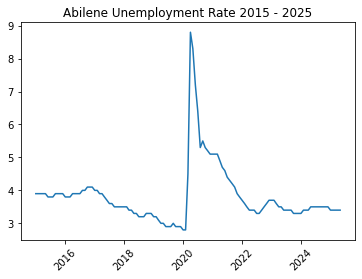

In [65]:
plt.plot(df['Date'], df['Abilene, TX'])
plt.xticks(rotation = 45)
plt.title('Abilene Unemployment Rate 2015 - 2025')
plt.show()

In [61]:
# Create set of stationary values for the data
df['Stationary'] = df['Abilene, TX'].diff()

# No previous value initially so start with 0
df.loc[0, 'Stationary'] = 0

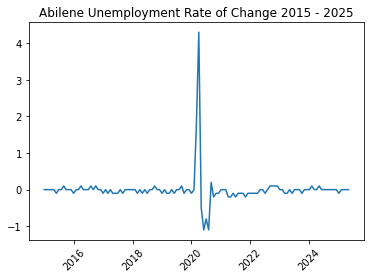

In [66]:
plt.plot(df['Date'], df['Stationary'])
plt.xticks(rotation = 45)
plt.title('Abilene Unemployment Rate of Change 2015 - 2025')
plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Text(0.5, 1.0, 'Unemployment Rate PACF')

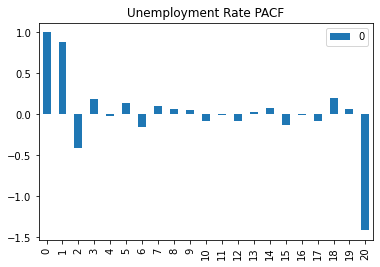

In [67]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(df['Abilene, TX']))
x_acf.plot(kind = 'bar')
plt.title("Unemployment Rate PACF")

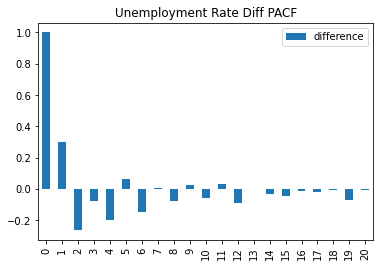

In [68]:
x_acf = pd.DataFrame(pacf(df['Stationary']))
x_acf.plot(kind='bar')
plt.title("Unemployment Rate Diff PACF")

For both initial values and the stationary set of data p-values 1 and 2 are notable. 20 stands out on its own in the initial data and stands out significantly.

In [87]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Abilene, TX'], order=(5,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            Abilene, TX   No. Observations:                  125
Model:                 ARIMA(5, 0, 0)   Log Likelihood                 -62.450
Date:                Mon, 07 Jul 2025   AIC                            138.900
Time:                        23:43:13   BIC                            158.698
Sample:                             0   HQIC                           146.943
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8045      0.932      4.081      0.000       1.977       5.631
ar.L1          1.2625      0.093     13.584      0.000       1.080       1.445
ar.L2         -0.5858      0.326     -1.796      0.0

In [78]:
model = ARIMA(df['Abilene, TX'], order=(0,5,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            Abilene, TX   No. Observations:                  125
Model:                 ARIMA(0, 5, 0)   Log Likelihood                -283.622
Date:                Mon, 07 Jul 2025   AIC                            569.245
Time:                        23:25:33   BIC                            572.032
Sample:                             0   HQIC                           570.377
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.6138      0.193     34.339      0.000       6.236       6.991
Ljung-Box (L1) (Q):                  58.02   Jarque-Bera (JB):              7041.74
Prob(Q):                              0.00   Pr

In [83]:
model = ARIMA(df['Abilene, TX'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            Abilene, TX   No. Observations:                  125
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -67.347
Date:                Mon, 07 Jul 2025   AIC                            140.694
Time:                        23:26:25   BIC                            149.155
Sample:                             0   HQIC                           144.131
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3983      0.073     -5.477      0.000      -0.541      -0.256
ma.L1          0.7880      0.071     11.066      0.000       0.648       0.928
sigma2         0.1729      0.006     31.424      0.0

In [81]:
model = ARIMA(df['Abilene, TX'], order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            Abilene, TX   No. Observations:                  125
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -64.987
Date:                Mon, 07 Jul 2025   AIC                            141.974
Time:                        23:25:45   BIC                            158.896
Sample:                             0   HQIC                           148.848
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3467      0.052      6.644      0.000       0.244       0.449
ar.L2         -0.2704      0.142     -1.899      0.058      -0.549       0.009
ar.L3          0.0080      0.181      0.044      0.9

In [80]:
model = ARIMA(df['Abilene, TX'], order=(5,1,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                               SARIMAX Results                                
Dep. Variable:            Abilene, TX   No. Observations:                  125
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 -63.546
Date:                Mon, 07 Jul 2025   AIC                            141.093
Time:                        23:25:37   BIC                            160.835
Sample:                             0   HQIC                           149.113
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4349      0.553     -0.787      0.431      -1.518       0.648
ar.L2         -0.0054      0.217     -0.025      0.980      -0.431       0.421
ar.L3         -0.1951      0.214     -0.910      0.3

In [ ]:
# 5,0,0 produced the lowest aic and the loglikelihood closest to 0 so thats most likely to allow for outcome prediction.

